# Game of Life

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [2]:
# from os.path import basename, exists

# def download(url):
#     filename = basename(url)
#     if not exists(filename):
#         from urllib.request import urlretrieve
#         local, _ = urlretrieve(url, filename)
#         print('Downloaded ' + local)
    
# download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from utils import savefig
# make a directory for figures
!mkdir -p figs

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file figs already exists.
Error occurred while processing: figs.


In [5]:
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/Cell2D.py')

NameError: name 'download' is not defined

## 2D Cellular Automaton



In [47]:
def possible_radii(n):
    returner = []
    for i in range(4, 30):
        for j in range(i+1, 30):
            if np.abs(j**2 - 2 * i**2) < n:
                returner.append((i, j))
                
    return returner

possible_radii(5)

[(4, 6), (5, 7), (7, 10), (10, 14), (12, 17), (17, 24)]

In [73]:
def kernel_creator(r_i, r_o, model=True):
    array = []
    item = 0
    x_i = np.floor((2 * r_o + 1)/2)
    y_i = np.floor((2 * r_o + 1)/2)
    for x in range(2 * r_o + 1):
        array.append([])
        for y in range(2 * r_o + 1):
            sqr = (x - x_i)**2 + (y - y_i)**2
            if (sqr <= r_i**2): item = 1
            elif (sqr <= r_o**2): item = -1 if model else 0
            else: item = 0
            
            array[x].append(item)
            
    return np.array(array)

kernel_creator(4,5, False)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [86]:
from scipy.signal import correlate2d
from Cell2D import Cell2D

class ReactionDiffusion(Cell2D):
    """Implementation of Martin Skrodzki´s Reaction."""        
    def __init__(self, n, r_i, r_o, random = True, static_neighbours=True):
        self.n = n
        self.r_i = r_i
        self.r_o = r_o
        self.options = dict(mode='same', boundary='wrap')        
        
        if random: self.array = np.random.randint(2, size=(n, n), dtype=np.uint8)
        else:
            self.array = np.zeros((n,n));
            self.add_cells(10,10, '1111111111', '1111111111', '1111111111')
        
        self.order_array = (self.array - 0.5) * 2
        
        self.kernel = kernel_creator(r_i, r_o)
        
        if static_neighbours:
            self.order_kernel = np.zeros((3,3))
            self.order_kernel[(0,1), (1,0)] = 1
            self.order_kernel[(1,2), (2,1)] = 1      
        else:
            self.order_kernel = kernel_creator(r_i, r_o, False)
        
        self.order_parameter = (np.sum(self.order_array * correlate2d(self.order_array, self.order_kernel, **self.options)) - 0.5) / (4*self.n**2)
        self.order_list = [self.order_parameter]
    
    def step(self):
        update_rule = correlate2d(self.array, self.kernel, mode='same', boundary='wrap')
        self.array = (update_rule > 0).astype(np.uint8) 
        self.order_array = (self.array - 0.5) * 2
        
        self.order_parameter = np.sum(self.array * correlate2d(self.array, self.order_kernel, **self.options)) / (4*self.n**2)
        self.order_list.append(self.order_parameter)

a = ReactionDiffusion(100, 4, 6, True, False)
a.order_kernel

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

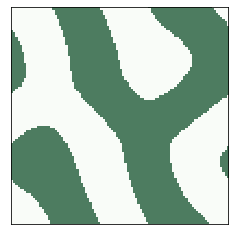

<ipython-input-87-063af810941f>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


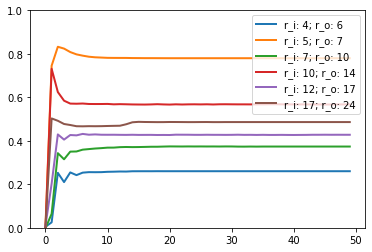

In [87]:
possible_radi = 0   
possible_radi = possible_radii(5)

list_of_orders = []
legend = []

for i, (r_i, r_o) in enumerate(possible_radi):
    a = ReactionDiffusion(100, r_i, r_o, True)
    a.animate(50, 0.01)
    list_of_orders.append(a.order_list)
    legend.append("r_i: " + str(a.r_i) + "; r_o: " + str(a.r_o))
#     savefig('figs/cell' + str(r_i) + str(r_o))
    
for i in list_of_orders:
    plt.plot(i)
ax = plt.axes()
ax.set(ylim=(0, 1))
plt.legend(legend, loc='upper right')
plt.show()
    
# savefig('figs/ordparrandom' + str(r_i) + str(r_o))

In [85]:
possible_radi = 0   
possible_radi = possible_radii(5)

print(possible_radi)
list_of_orders = []
for i, (r_i, r_o) in enumerate([possible_radi[-1]]):
    a = ReactionDiffusion(100, r_i, r_o, False)
    a.animate(50, 0.01)
#     savefig('figs/cell' + str(r_i) + str(r_o))
    plt.plot(a.order_list)
    savefig('figs/ordparsegr' + str(r_i) + str(r_o))

[(4, 6), (5, 7), (7, 10), (10, 14), (12, 17), (17, 24)]


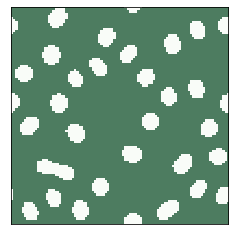

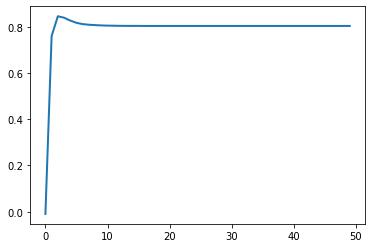

In [61]:
possible_radi = possible_radii(5)

list_of_orders = []
for i, (r_i, r_o) in enumerate(possible_radi[1:2]):
    for i in range(10):
        a = ReactionDiffusion(100, r_i, r_o, True)
        a.animate(50, 0.01)
#     savefig('figs/cell' + str(r_i) + str(r_o))
        legend.append(str(i))
        plt.plot(a.order_list)
#     savefig('figs/ordparsegr' + str(r_i) + str(r_o))
    plt.show()

The following function creates a `Life` object and sets the initial condition using strings of `0` and `1` characters.

In [7]:
def make_life(n, m, row, col, *strings):
    """Makes a Life object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    life = Life(n, m)
    life.add_cells(row, col, *strings)
    return life

In [8]:
list = []
for i in range(1, 10):
    list.append([])
    for o in range (i, 10):
        a = (2 * i**2, o**2)
        list[i-1].append(a)
        
print(list)




[[(2, 1), (2, 4), (2, 9), (2, 16), (2, 25), (2, 36), (2, 49), (2, 64), (2, 81)], [(8, 4), (8, 9), (8, 16), (8, 25), (8, 36), (8, 49), (8, 64), (8, 81)], [(18, 9), (18, 16), (18, 25), (18, 36), (18, 49), (18, 64), (18, 81)], [(32, 16), (32, 25), (32, 36), (32, 49), (32, 64), (32, 81)], [(50, 25), (50, 36), (50, 49), (50, 64), (50, 81)], [(72, 36), (72, 49), (72, 64), (72, 81)], [(98, 49), (98, 64), (98, 81)], [(128, 64), (128, 81)], [(162, 81)]]
